## **House Fair Price Prediction Using Regression Models**

In [ ]:
from google.colab import files

uploaded=files.upload()


Saving house_dataset.csv to house_dataset.csv


##**Importing Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

##**Load dataset**

In [ ]:
df=pd.read_csv("house_dataset.csv")  ## To load the dataset

In [ ]:
df.head() ## To show the top 5 datapoints

,Area (sqft),Bedrooms,Bathrooms,Distance to City,Parking Space,House Age (yrs),Price (in lakhs)
0,1360,2,3,28.51,2,37,11.24
1,1794,1,1,23.14,2,14,57.01
2,1630,4,2,5.06,1,20,124.21
3,1595,2,1,26.19,0,9,49.17
4,2138,4,2,15.14,0,22,126.91


In [ ]:
df.shape ## To display the size of the data

(500, 7)

In [ ]:
df.describe()

,Area (sqft),Bedrooms,Bathrooms,Distance to City,Parking Space,House Age (yrs),Price (in lakhs)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2022.420000,2.424000,2.022000,15.758340,0.976000,24.950000,86.536240
std,845.049606,1.148417,0.819059,8.624099,0.800441,14.185978,50.868419
min,501.000000,1.000000,1.000000,1.190000,0.000000,0.000000,-49.710000
25%,1315.000000,1.000000,1.000000,7.880000,0.000000,13.750000,49.387500
50%,2009.500000,2.000000,2.000000,16.260000,1.000000,24.000000,85.120000
75%,2753.500000,3.000000,3.000000,23.345000,2.000000,37.000000,125.167500
max,3499.000000,4.000000,3.000000,29.940000,2.000000,49.000000,220.980000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area (sqft)       500 non-null    int64  
 1   Bedrooms          500 non-null    int64  
 2   Bathrooms         500 non-null    int64  
 3   Distance to City  500 non-null    float64
 4   Parking Space     500 non-null    int64  
 5   House Age (yrs)   500 non-null    int64  
 6   Price (in lakhs)  500 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 27.5 KB


In [ ]:
df.dtypes  ##To display the datatypes of features

,0
Area (sqft),int64
Bedrooms,int64
Bathrooms,int64
Distance to City,float64
Parking Space,int64
House Age (yrs),int64
Price (in lakhs),float64


In [ ]:
df.isna()   ##used to find null values in the data

,Area (sqft),Bedrooms,Bathrooms,Distance to City,Parking Space,House Age (yrs),Price (in lakhs)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False


In [ ]:
df.isna().sum() ## gives the number of rows of data which are Na

,0
Area (sqft),0
Bedrooms,0
Bathrooms,0
Distance to City,0
Parking Space,0
House Age (yrs),0
Price (in lakhs),0


In [ ]:
df.isnull().sum() ## gives the number of rows of data which are null

,0
Area (sqft),0
Bedrooms,0
Bathrooms,0
Distance to City,0
Parking Space,0
House Age (yrs),0
Price (in lakhs),0


In [ ]:
df.duplicated().sum() ## To find the rows which are duplicated

np.int64(0)

In [ ]:
df.loc[df.duplicated()]

,Area (sqft),Bedrooms,Bathrooms,Distance to City,Parking Space,House Age (yrs),Price (in lakhs)


##**Data Visualization**

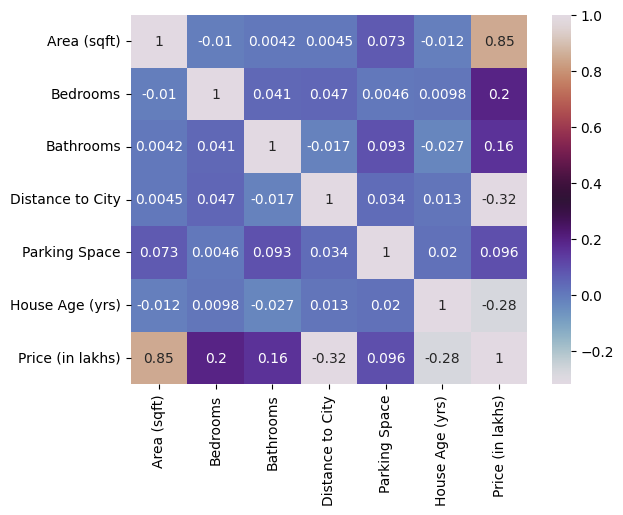

In [ ]:
cors=sns.heatmap(df.corr(),annot=True,cmap='twilight') ## Heatmap to find the corelation

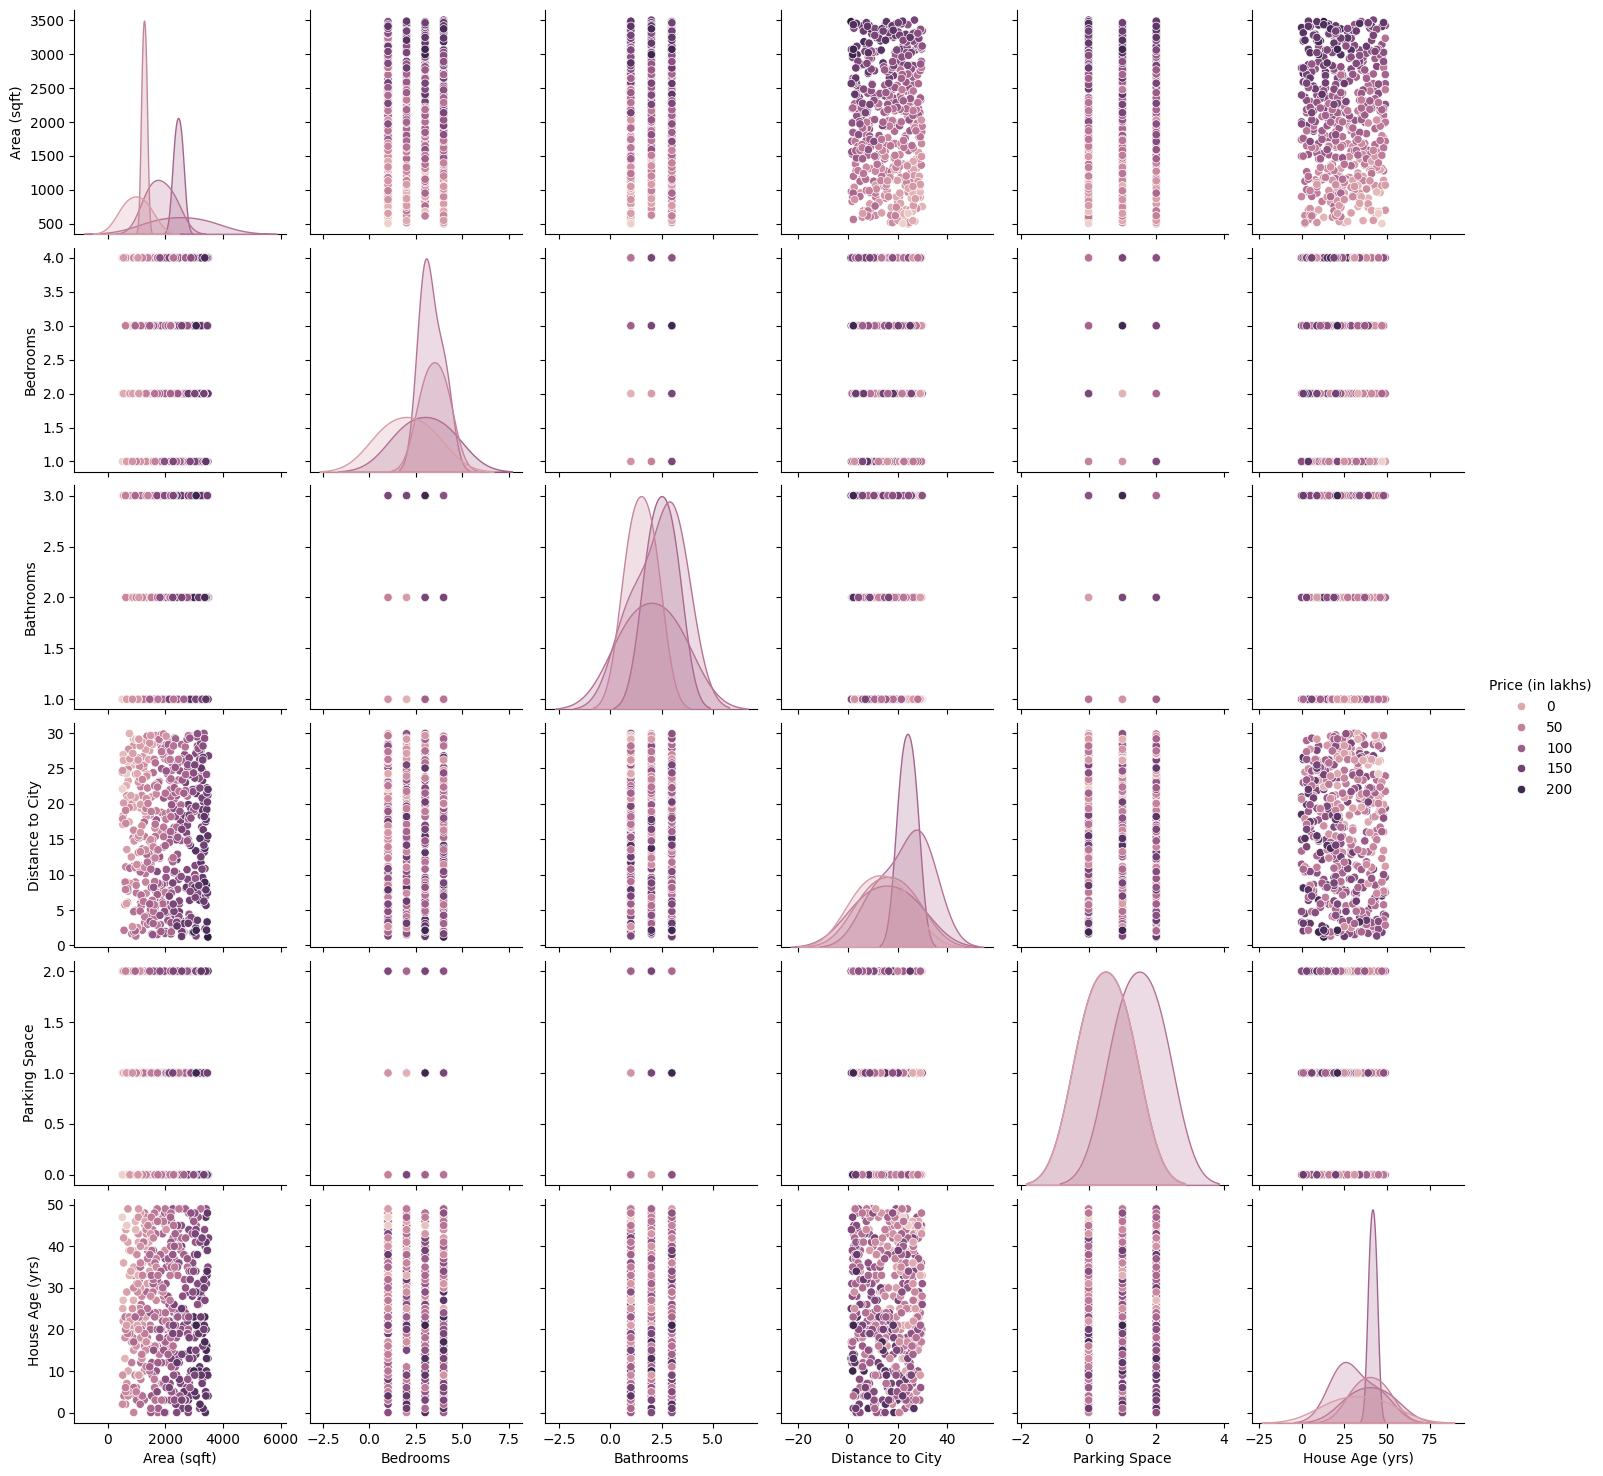

In [ ]:
sns.pairplot(data=df, hue="Price (in lakhs)")
plt.show()

<Axes: xlabel='Price (in lakhs)'>

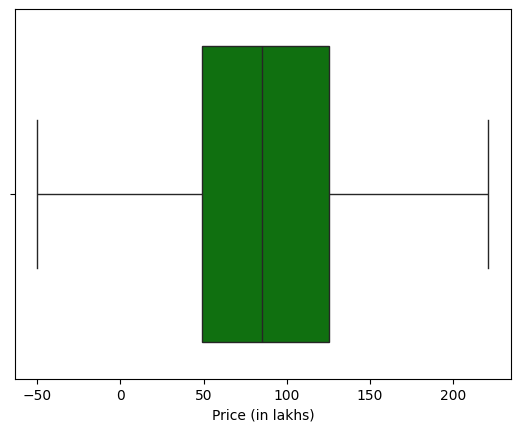

In [ ]:
sns.boxplot(x='Price (in lakhs)',data=df,color='green')

In [ ]:
#To remove non ngative prices which are irrelavant
a=df['Price (in lakhs)']<=0
print(df[a].shape)
df[a]

(20, 7)


,Area (sqft),Bedrooms,Bathrooms,Distance to City,Parking Space,House Age (yrs),Price (in lakhs)
24,521,4,1,17.07,2,25,-7.69
37,1062,1,1,13.14,0,41,-3.46
51,741,2,2,17.43,1,39,-2.16
85,837,1,1,26.32,0,20,-10.79
106,891,3,1,29.16,0,27,-11.53
110,878,2,1,25.49,1,39,-17.28
148,595,1,1,22.39,1,13,-14.27
236,686,4,1,20.72,1,45,-3.68
246,646,1,2,22.56,1,21,-6.54
292,753,1,2,29.92,0,33,-14.55


In [ ]:
df=df[df['Price (in lakhs)']>0]
df.shape

(480, 7)

<Axes: >

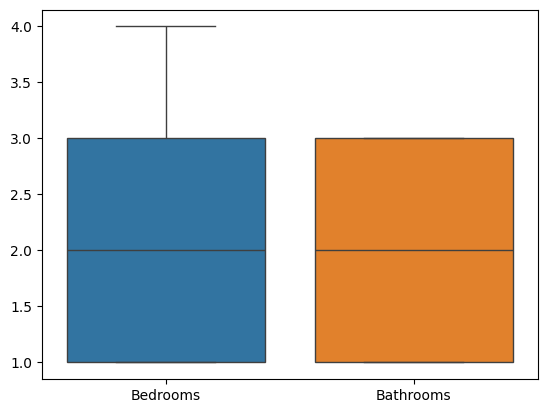

In [ ]:
sns.boxplot(data=df[['Bedrooms','Bathrooms']])

##**Machine learning algorithms**

In [ ]:
X=df.drop('Price (in lakhs)',axis=1) ##Features
y=df['Price (in lakhs)'] ## Label or Target

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42) ## dividing the data for training and testing

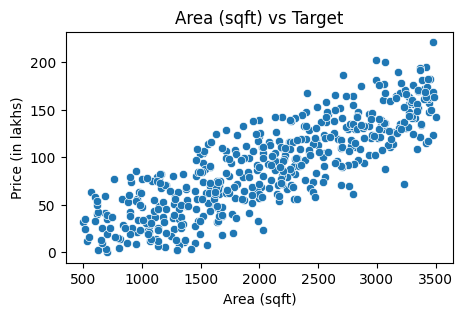

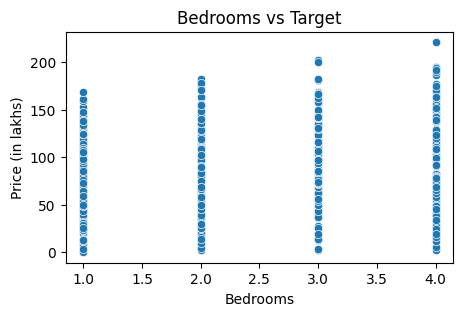

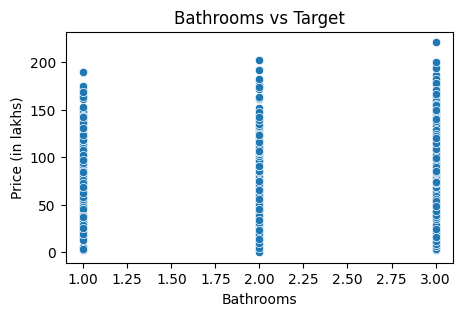

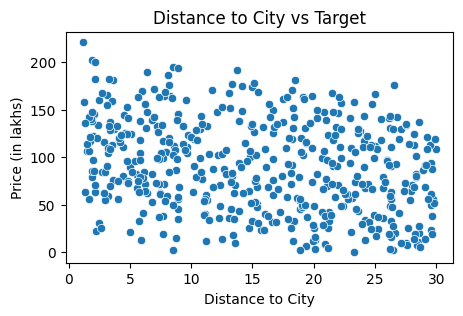

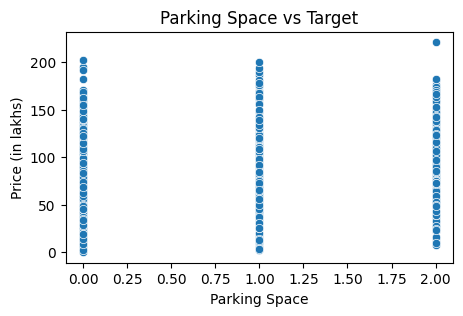

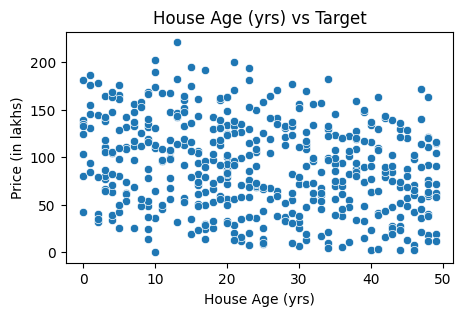

In [ ]:
for column in X.columns:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=X[column], y=y)
    plt.title(f'{column} vs Target')
    plt.show()

In [ ]:
correlation = pd.concat([X, y], axis=1).corr()
print(correlation["Price (in lakhs)"].sort_values(ascending=False))

Price (in lakhs)    1.000000
Area (sqft)         0.833482
Bedrooms            0.169484
Bathrooms           0.102740
Parking Space       0.090097
House Age (yrs)    -0.247302
Distance to City   -0.269288
Name: Price (in lakhs), dtype: float64


Only area and price have strong linear relationship from the scatterplot.From correlation, Area only have value >0.7. Showing linear relation. So Linear Regression cannot be used as an ideal method for prediction

## **Linear Regression**

In [ ]:
model=LinearRegression() #Linear model creation
model.fit(X_train,y_train) #Fitting the training features and target to the model

LinearRegression()

In [ ]:
y_pred=model.predict(X_test) #To predict the target values using test data

In [ ]:
print(y_pred)

[ 94.56508563 203.23123494  13.07692451  78.47387607 116.5846289
  78.78947913 108.55559977 150.58982951  27.52806592  44.22878273
 100.58992778 132.16155817  61.05540177  83.42454379  91.36593427
 168.29936927 110.5784902   69.53864677  76.31359146  77.26568666
  47.56452514  75.94587236  63.4206808   50.06468059 100.28702794
 120.68979067 138.22944538 171.20627432  95.52661629  22.62640103
 138.83663726 105.73975322 149.83819464  63.3075822  174.34522857
 142.69292617  51.27565633 185.14188609 127.20323885 149.11454607
 132.01848852  78.13721311  26.02736035  35.26507095 104.48407593
 125.66752273  74.54393762  12.58641718 127.26502237 110.40925526
  51.67678445   1.27196068 173.12303982  91.85920757  56.6328141
  44.49495021  46.32723429  94.68105423 141.67771192  67.67649035
 117.43906536  71.34439493  34.02292755  39.13123423 129.66733275
  89.00819898  63.0094442  115.7230588   31.07639485  36.50773337
 134.85123761  78.19256713  77.5626971   36.56180953 133.54634351
  46.6451067

In [ ]:
b=mean_squared_error(y_test,y_pred)
print(f'Mean squared Error=',b)     ## predicted price differ from actual price by 10 lakh

Mean squared Error= 100.90070866927128


In [ ]:
c=r2_score(y_test,y_pred)
print(f'R2 score on Test data',c)  ## 1 gives better fit

R2 score on Test data 0.9497208092801454


In [ ]:
## To check for overfitting, underfitting
y_train_pred = model.predict(X_train)
d=r2_score(y_train,y_train_pred)
print(f'R2 score on train data',d)

R2 score on train data 0.9543926994489432


Test score < Train score and value close to one. so no overfitting so no need of regularization

In [ ]:
model.coef_  ##how much the feature variable varies from target


array([ 0.05061193,  9.98933784,  7.37998883, -1.92185377,  2.64438886,
       -0.93905505])

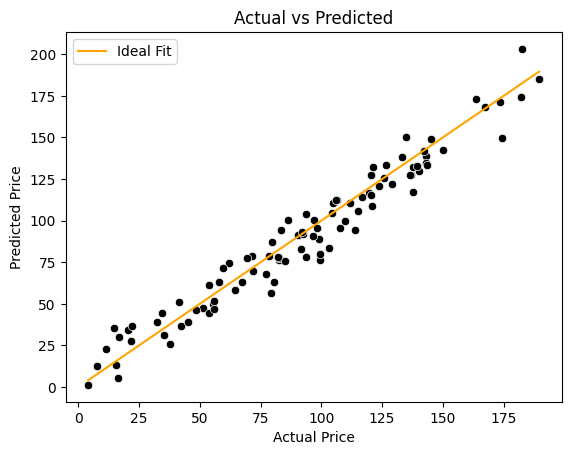

In [ ]:
sns.scatterplot(x=y_test,y=y_pred,color='black')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='orange',label='Ideal Fit')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend(loc='best')
plt.grid('True')
plt.show()



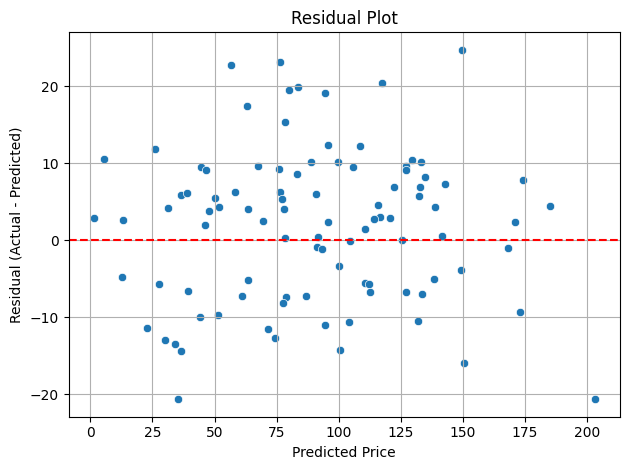

In [ ]:
residuals = y_test - y_pred  # Actual - Predicted

sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--') ## horizontal line plotted at y=0
plt.xlabel('Predicted Price')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Decision Tree Regression**

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
X=df.drop('Price (in lakhs)',axis=1)
y=df['Price (in lakhs)']

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [88]:
model3=DecisionTreeRegressor(random_state=42,max_depth=10)
model3.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

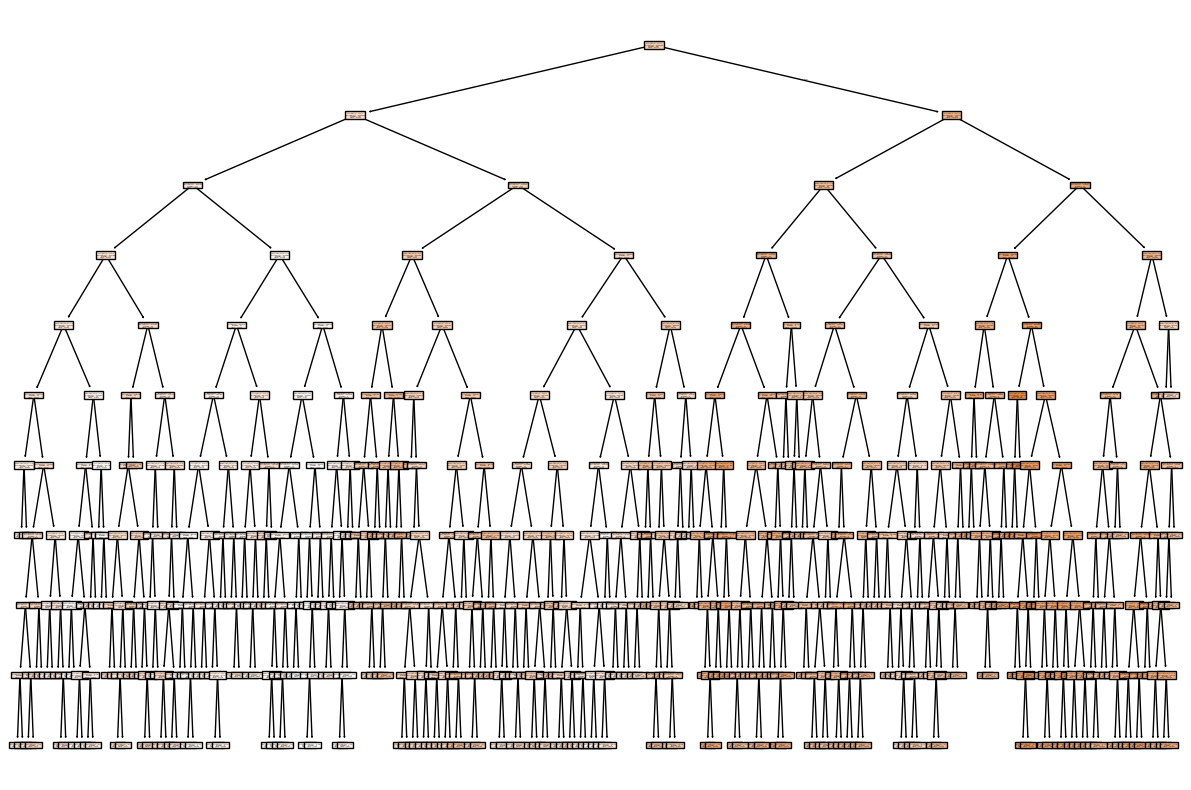

In [89]:
## Plotting tree to show branches
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plot_tree(model3, filled=True, feature_names=X.columns)
plt.show()

In [90]:
y_pred= model3.predict(X_test)
y_predtrain=model3.predict(X_train)

In [91]:
# To calculate the evaluation matrix
d=r2_score(y_test,y_pred)
print(f'R2 score for test data',d)
print(f'R2 score on train data',r2_score(y_train,y_predtrain))

R2 score for test data 0.72011257467121
R2 score on train data 0.9988787454358602


It can be observed that model learned largely from train data which results in overfitting of model(if max_depth is not selected as the branches will go on and model learns the training data too much

In [92]:
##Testing the performance of test data
sample = X_test.iloc[[0]]
prediction = model3.predict(sample)

print("Features of this sample:")
sample

Features of this sample:


,Area (sqft),Bedrooms,Bathrooms,Distance to City,Parking Space,House Age (yrs)
76,2481,4,1,18.12,0,42


In [93]:
print("Model Prediction value :", prediction[0])
actual_value = y_test.iloc[0]
print("Actual Value:", actual_value)

Model Prediction value : 76.15
Actual Value: 83.58


It’s a high-variance model, which means it depends a lot on the training data.
Small change in data can produce a very different tree.
It often overfits — performs great on training, but poor on new, unseen data.

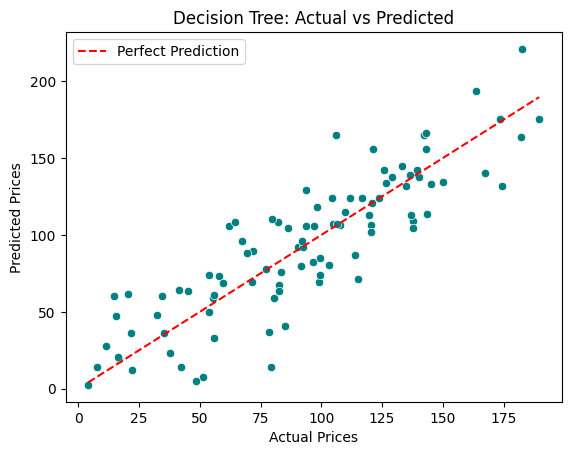

In [94]:
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Decision Tree: Actual vs Predicted')
plt.legend()
plt.show()

## **Random Forest Regression(Bagging Algorithm)**

Ensemble learning combines multiple simple models to create a stronger, smarter model. There are mainly two types of ensemble learning:

Bagging that combines multiple models trained independently.
Boosting that builds models sequentially each correcting the errors of the previous one.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X=df.drop('Price (in lakhs)',axis=1)
y=df['Price (in lakhs)']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model4=RandomForestRegressor(n_estimators=100,max_features='sqrt',random_state=42) # uses 100 trees and square root of the fetaures passsed
model4.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

In [ ]:
y_pred=model4.predict(X_test)
y_predtrain=model4.predict(X_train)

In [ ]:
print(f'R2 score on test data',r2_score(y_test,y_pred))
print(f'R2 score on Train data',r2_score(y_train,y_predtrain))   ## for testing if there is any overfitting or underfitting

R2 score on test data 0.8660578373189295
R2 score on Train data 0.9830557211470353


The values are close and no overfitting is observed

In [ ]:
#Testing for prediction
sample=X_test.iloc[[0]]
print('Features of test data')
sample

Features of test data


,Area (sqft),Bedrooms,Bathrooms,Distance to City,Parking Space,House Age (yrs)
76,2481,4,1,18.12,0,42


In [ ]:
prediction=model4.predict(sample)
print(f'Predicted value',prediction[0])
print(f'Actual value',y_test.iloc[0])

Predicted value 102.8536
Actual value 83.58


Although the Decision Tree came closer on this single instance, the Random Forest performs better overall with higher R² and lower error on average.


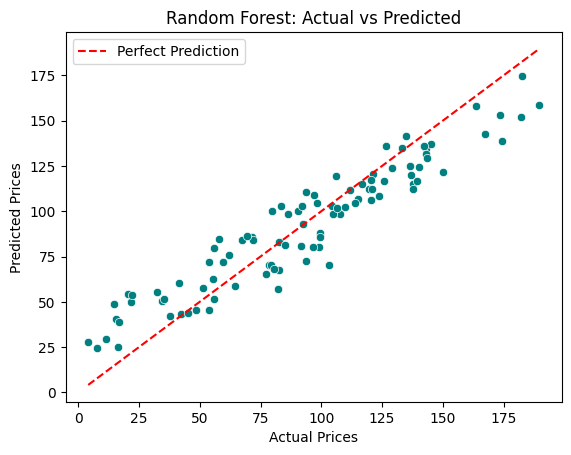

In [ ]:
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()
plt.show()

## **Gradient Boosting with XGBoost Regression**

### It builds an ensemble of decision trees sequentially, where each tree tries to fix the errors of the previous one. It uses gradient descent to minimize loss, improving prediction at every step.

In [75]:
import xgboost as xgb

In [76]:
X=df.drop('Price (in lakhs)',axis=1)
y=df['Price (in lakhs)']

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
model5 = xgb.XGBRegressor(n_estimators=500,max_depth=2,learning_rate=0.1,random_state=42,reg_alpha=0.5,reg_lambda=1.0)
model5.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

| Parameter           | Meaning                                                                                                      |
| ------------------- | ------------------------------------------------------------------------------------------------------------ |
| `n_estimators=500`  | Number of **trees** to build (i.e., boosting rounds). More trees = better learning (risk of overfitting).    |
| `max_depth=2`       | Max depth of each tree. Smaller depth = simpler trees → prevents overfitting.                                |
| `learning_rate=0.1` | Controls how much each tree **corrects the errors** of the previous one. Lower = slower but safer learning.  |
| `random_state=42`   | Ensures **reproducibility** of results by controlling randomness.                                            |
| `reg_alpha=0.5`     | **L1 regularization** term (like in Lasso) → encourages sparsity in leaf weights, helps prevent overfitting. |
| `reg_lambda=1.0`    | **L2 regularization** term (like in Ridge) → helps with smoothing and reduces model complexity.              |


In [79]:
y_pred=model5.predict(X_test)
y_predtrain=model5.predict(X_train)

In [80]:
print(f'R2 score on test data',r2_score(y_pred,y_test))
print(f'R2 score on train data',r2_score(y_predtrain,y_train))

R2 score on test data 0.8957925225269913
R2 score on train data 0.9840777576056675


In [81]:
print(f'Mean squared error on test',mean_squared_error(y_pred,y_test))
print(f'Mean squared error on train',mean_squared_error(y_predtrain,y_train))

Mean squared error on test 181.33961824616154
Mean squared error on train 35.56950211366625


In [82]:
#Testing model
sample=X_test.iloc[[0]]
pred=model5.predict(sample)

print(f'sample')
sample

sample


,Area (sqft),Bedrooms,Bathrooms,Distance to City,Parking Space,House Age (yrs)
76,2481,4,1,18.12,0,42


In [83]:
print('Predicted price',pred[0])
print('Actual Price',y_test.iloc[0])

Predicted price 100.96219
Actual Price 83.58


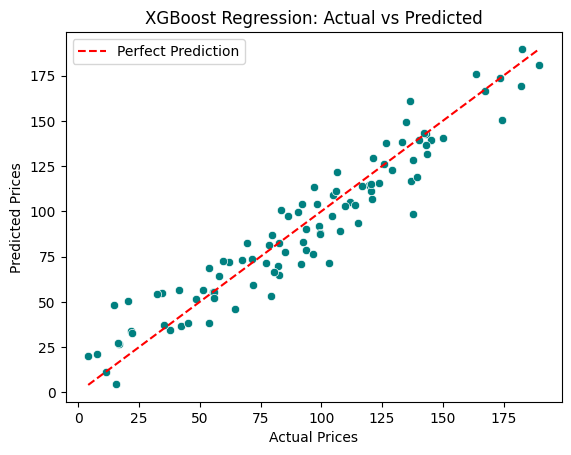

In [84]:
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('XGBoost Regression: Actual vs Predicted')
plt.legend()
plt.show()

##Conclusion

We can conclude that Linear Regression performs better than other models. Although XGBoost Regression seems better as a model for complex non linear data